In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dd = pd.read_csv('survey.csv')

In [8]:
dd

,id,latitude,longitude,issues,parking_duration,parking_time,comments
0,1356,43.659967,-79.377875,['damaged'],['hours'],2019-06-01T14:42:10.000Z,Bike has been here forever
1,1398,43.705947,-79.442328,['not_provided'],['minutes'],2019-07-23T16:55:00.000Z,No bike parking anywhere close by. This is a b...
2,1435,43.687222,-79.398346,['not_provided'],['hours'],2019-08-23T19:25:38.000Z,NaN
3,407,43.647360,-79.395535,['full'],['hours'],2018-06-07T19:10:59.000Z,NaN
4,1465,43.658446,-79.359498,['damaged'],['hours'],2019-10-10T00:19:30.000Z,Several abandoned bikes on rack at Regent Park...
...,...,...,...,...,...,...,...
1304,1397,43.644368,-79.524084,['not_provided'],['hours'],2019-07-22T17:36:38.000Z,I regularly have appointments at Physiofirst a...
1305,1416,43.707229,-79.390679,['not_provided'],['minutes'],2019-08-05T14:59:57.000Z,NaN
1306,1434,43.641734,-79.421837,['damaged'],['minutes'],2019-08-20T21:07:42.000Z,NaN
1307,1464,43.665879,-79.468489,['not_provided'],['hours'],2019-10-05T16:56:56.000Z,These are wasted bollards at a popular interse...


In [9]:
ontario_data = dd[
    (dd['latitude'] >= 41.676) & (dd['latitude'] <= 56.856) &  # Ontario latitude range
    (dd['longitude'] >= -95.156) & (dd['longitude'] <= -74.343)  # Ontario longitude range
]

# Keep only relevant columns
columns_to_keep = ['id', 'latitude', 'longitude', 'issues', 'parking_duration', 'parking_time']
ontario_data = ontario_data[columns_to_keep]

# Reset the index
ontario_data.reset_index(drop=True, inplace=True)

# Save the filtered dataset to a CSV file
ontario_data.to_csv('ontario_filtered_data.csv', index=False)

# Display the first few rows of the filtered data
print(ontario_data.head())

     id   latitude  longitude            issues parking_duration  \
0  1356  43.659967 -79.377875       ['damaged']        ['hours']   
1  1398  43.705947 -79.442328  ['not_provided']      ['minutes']   
2  1435  43.687222 -79.398346  ['not_provided']        ['hours']   
3   407  43.647360 -79.395535          ['full']        ['hours']   
4  1465  43.658446 -79.359498       ['damaged']        ['hours']   

               parking_time  
0  2019-06-01T14:42:10.000Z  
1  2019-07-23T16:55:00.000Z  
2  2019-08-23T19:25:38.000Z  
3  2018-06-07T19:10:59.000Z  
4  2019-10-10T00:19:30.000Z  


In [10]:
# Count the occurrences of each parking duration type
duration_counts = ontario_data['parking_duration'].value_counts()

# Display the counts for verification
print(duration_counts)

parking_duration
['hours']                                                             591
['minutes']                                                           393
['multiday']                                                          119
['overnight']                                                          66
['>1hour']                                                             15
['1-2hours']                                                           15
['hours', 'minutes']                                                    9
['hours', 'multiday']                                                   9
['4-8hours']                                                            6
['1-2hours', '1-2hours']                                                4
['overnight+']                                                          3
['hours', 'minutes', 'overnight', 'hours', 'multiday', 'multiday']      2
['multiday', 'minutes', 'minutes']                                      2
['hours', 'hours']   

In [11]:
def categorize_duration(duration):
    if 'minute' in str(duration).lower():
        return 'Minutes'
    elif 'hour' in str(duration).lower():
        return 'Hours'
    elif 'overnight' in str(duration).lower():
        return 'Overnight'
    elif 'multiday' in str(duration).lower():
        return 'Multiday'
    else:
        return 'Unknown'

# Apply the function to create a new category column
ontario_data['duration_category'] = ontario_data['parking_duration'].apply(categorize_duration)

# Group by the new category column
category_counts = ontario_data['duration_category'].value_cou
nts()

# Display the counts for each category
print(category_counts)

duration_category
Hours        652
Minutes      414
Multiday     119
Overnight     69
Name: count, dtype: int64


/tmp/ipykernel_70/3338020659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


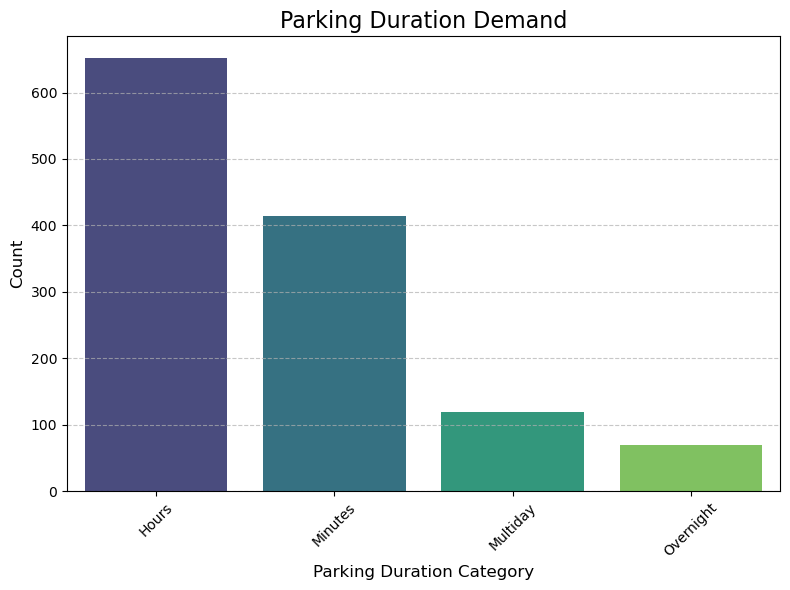

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# Add titles and labels
plt.title('Parking Duration Demand', fontsize=16)
plt.xlabel('Parking Duration Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
from collections import Counter
import ast

In [14]:
issues_list = (dd['issues'].unique())

/tmp/ipykernel_70/3822651574.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Issue', data=filtered_counts, palette='viridis')


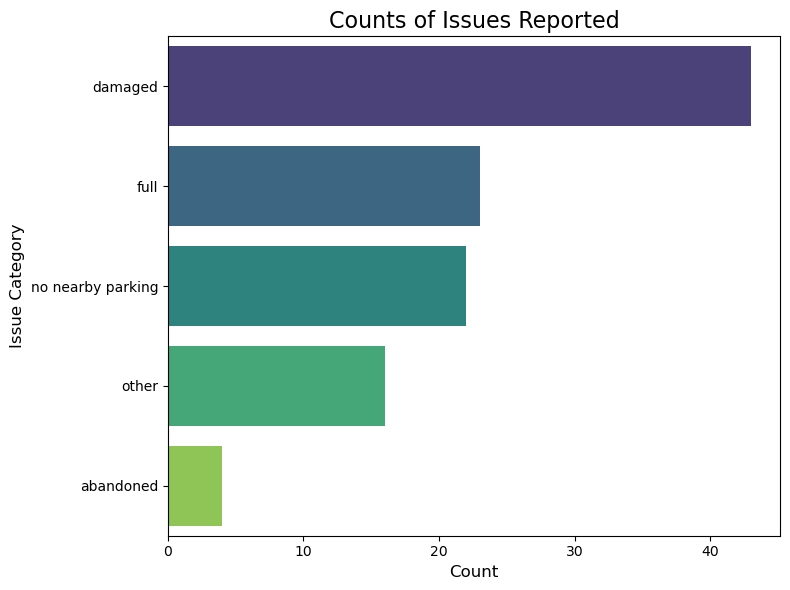

In [15]:
issues_list = [
    "['damaged']", "['not_provided']", "['full']", "['other']",
    "['not_provided', 'full', 'damaged', 'damaged', 'other']",
    "['full', 'damaged']", "['full', 'not_provided']",
    "['damaged', 'damaged', 'full']", "[]", "['not_provided', 'other']",
    "['damaged', 'full']", "['damaged', 'other']",
    "['not_provided', 'damaged', 'damaged']", "['not_provided', 'damaged']",
    "['not_provided', 'full']", "['damaged', 'other', 'full', 'not_provided']",
    "['damaged', 'damaged']",
    "['other', 'damaged', 'damaged', 'full', 'not_provided']",
    "['not_provided', 'full', 'damaged']", "['full', 'other']",
    "['other', 'not_provided', 'damaged']", "['other', 'damaged']",
    "['full', 'not_provided', 'damaged']",
    "['damaged', 'not_provided', 'full']", "['full', 'damaged', 'other']",
    "['not_provided', 'full', 'other', 'damaged', 'damaged']",
    "['damaged', 'not_provided']", "['damaged', 'full', 'damaged']",
    "['damaged', 'full', 'not_provided']",
    "['not_provided', 'damaged', 'damaged', 'full']",
    "['damaged', 'other', 'damaged']", "['other', 'not_provided']",
    "['full', 'damaged', 'other', 'damaged']",
    "['not_provided', 'damaged', 'abandoned', 'damaged', 'full']",
    "['full', 'not_provided', 'damaged', 'damaged', 'abandoned']",
    "['other', 'not_provided', 'full', 'damaged', 'damaged']", "['abandoned']",
    "['abandoned', 'damaged']",
    "['damaged', 'damaged', 'full', 'not_provided', 'other']"
]

# Parse the string lists into actual Python lists
parsed_issues = [ast.literal_eval(issue) for issue in issues_list]

# Flatten the list to get all issues in a single list
flattened_issues = [issue for sublist in parsed_issues for issue in sublist]

# Replace 'not_provided' with 'no nearby parking'
flattened_issues = ['no nearby parking' if issue == 'not_provided' else issue for issue in flattened_issues]

# Count the occurrences of each issue
issue_counts = Counter(flattened_issues)

# Convert the counts to a DataFrame for visualization
issue_counts_df = pd.DataFrame(issue_counts.items(), columns=['Issue', 'Count']).sort_values(by='Count', ascending=False)

# Filter to keep only the categories of interest
categories_to_keep = ['full', 'damaged', 'no nearby parking', 'other', 'abandoned']
filtered_counts = issue_counts_df[issue_counts_df['Issue'].isin(categories_to_keep)]

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Issue', data=filtered_counts, palette='viridis')

# Add labels and title
plt.title('Counts of Issues Reported', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Issue Category', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
# Convert parking_time to datetime
dd['parking_time'] = pd.to_datetime(dd['parking_time'], errors='coerce')

# Drop rows with invalid or missing parking_time
dd = dd.dropna(subset=['parking_time'])

# Extract the day of the week from parking_time
dd['day_of_week'] = dd['parking_time'].dt.day_name()

In [17]:
day_counts = dd['day_of_week'].value_counts()

# Reorder days of the week for proper order
day_counts = day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Display the counts
print(day_counts)

day_of_week
Monday       168
Tuesday      185
Wednesday    289
Thursday     229
Friday       187
Saturday     133
Sunday       118
Name: count, dtype: int64


/tmp/ipykernel_70/400220403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')


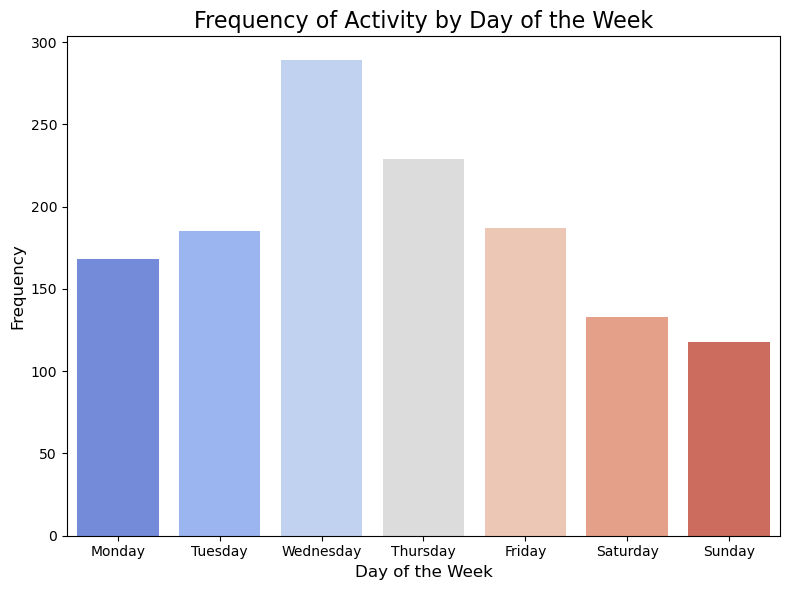

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')

# Add labels and title
plt.title('Frequency of Activity by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the graph
plt.tight_layout()
plt.show()